# Importing Libraries

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error
%matplotlib inline

from sklearn.preprocessing import MaxAbsScaler,PowerTransformer,MinMaxScaler,RobustScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.inspection import permutation_importance

from xgboost import XGBRegressor

from scipy.stats import skew

from scipy import stats

# Loading Train and Test Data

In [139]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# train_df=pd.read_csv('../input/bike-sharing-demand/train.csv')
# test_df=pd.read_csv('../input/bike-sharing-demand/test.csv')
train_df=pd.read_csv('dataset/train.csv')
test_df=pd.read_csv('dataset/test.csv')
test_date=test_df.Date
display(train_df.head())

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# EDA

In [140]:
display(train_df.describe().T)
display(train_df.info())
train_df[train_df['y']<0]

,count,mean,std,min,25%,50%,75%,max
ID,5760.0,2879.500000,1662.913107,0.0,1439.75,2879.50,4319.250,5759.00
y,5760.0,703.483854,655.249491,0.0,188.00,485.50,1066.000,3556.00
Hour,5760.0,11.500000,6.922788,0.0,5.75,11.50,17.250,23.00
Temperature(�C),5760.0,12.803559,11.902206,-15.1,3.20,13.70,22.225,39.40
Humidity(%),5760.0,58.361806,19.840167,0.0,43.00,57.00,73.000,98.00
Wind speed (m/s),5760.0,1.723333,1.047898,0.0,0.90,1.50,2.300,7.40
Visibility (10m),5760.0,1473.711458,585.879880,27.0,1025.75,1732.00,2000.000,2000.00
Dew point temperature(�C),5760.0,4.058264,13.003582,-26.9,-5.40,5.20,14.700,27.20
Solar Radiation (MJ/m2),5760.0,0.572325,0.869943,0.0,0.00,0.01,0.940,3.52
Rainfall(mm),5760.0,0.135122,1.075320,0.0,0.00,0.00,0.000,35.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5760 non-null   int64  
 1   Date                       5760 non-null   object 
 2   y                          5760 non-null   int64  
 3   Hour                       5760 non-null   int64  
 4   Temperature(�C)            5760 non-null   float64
 5   Humidity(%)                5760 non-null   int64  
 6   Wind speed (m/s)           5760 non-null   float64
 7   Visibility (10m)           5760 non-null   int64  
 8   Dew point temperature(�C)  5760 non-null   float64
 9   Solar Radiation (MJ/m2)    5760 non-null   float64
 10  Rainfall(mm)               5760 non-null   float64
 11  Snowfall (cm)              5760 non-null   float64
 12  Seasons                    5760 non-null   object 
 13  Holiday                    5760 non-null   objec

None

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [141]:
#duplicates Checking
train_df.duplicated().sum()


0

**⚡ No Duplicates**

In [142]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

ID                           0
Date                         0
y                            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64
ID                           0
Date                         0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


**⚡ No Missing Data**

In [143]:
# check when the not a workingday there is no rental of bike
#But found there exist renting
z=train_df[train_df['Functioning Day']=='No']
z['y'].shape
print(z['y'].unique())

[0]


In [144]:
# humidity_filter = train_df['Humidity(%)'] == 0
# print("sum of rows where humidity equals zero:", humidity_filter.sum())
# train_df.drop(index = train_df.loc[humidity_filter].index, inplace=True)

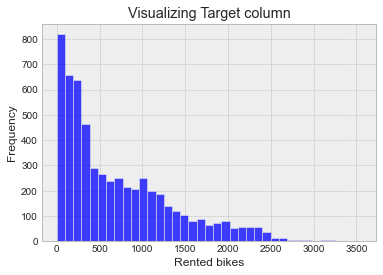

In [145]:
#right Skewed Label
_=sns.histplot(train_df['y'])
_=plt.title("Visualizing Target column")
_=plt.xlabel("Rented bikes")
_=plt.ylabel("Frequency")

**⚡ It's Right
Skewed :(**

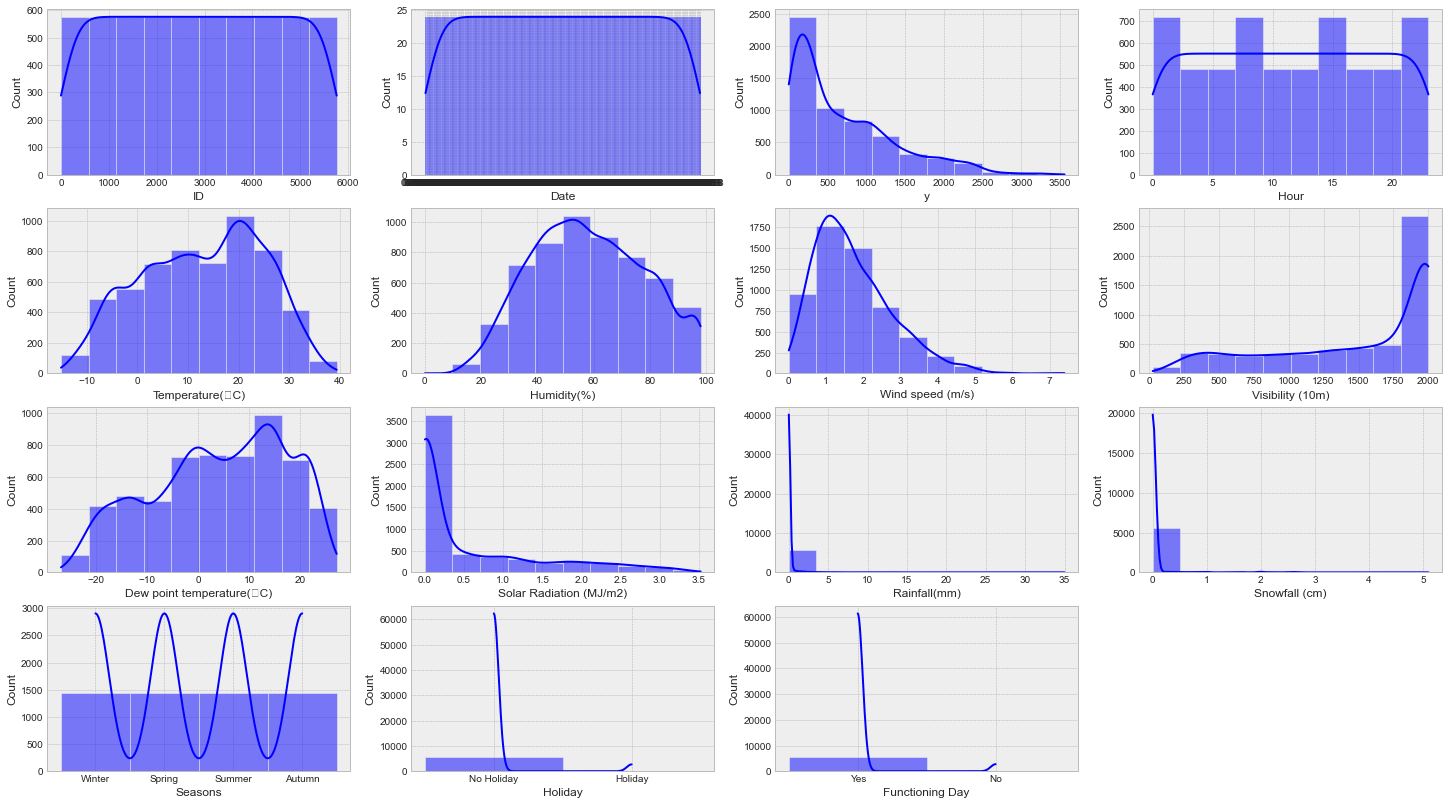

In [146]:
#Data Distributions
plt.figure(figsize=(25, 25))
for i, col in enumerate(list(train_df.columns)):
    plt.subplot(7, 4, i+1)
    sns.histplot(train_df[col], kde=True, bins=10)

In [147]:
def drawFeatures_VS_y(df):
    for col in df.columns:
        col_rental = df.groupby(col,as_index=False)['y'].mean()
        sns.scatterplot(data = col_rental,x=col,y='y')
        plt.title(col)
        plt.show()

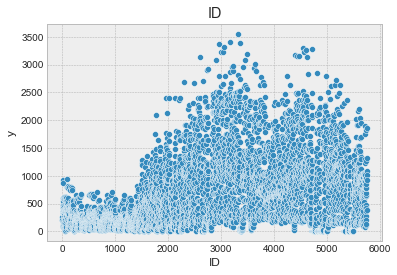

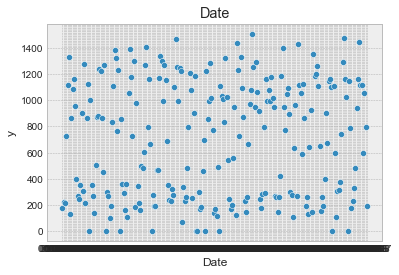

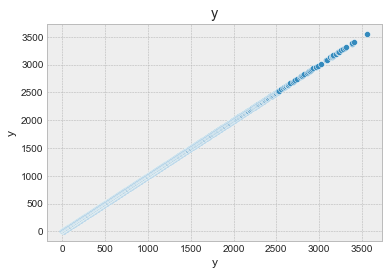

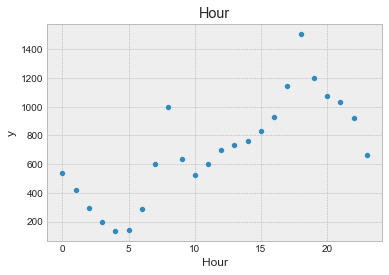

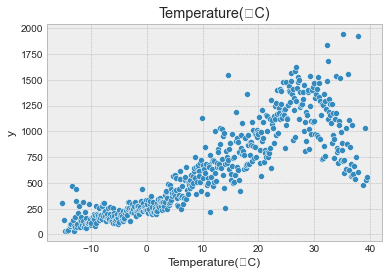

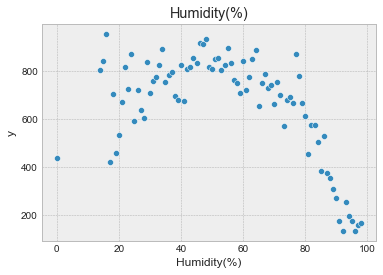

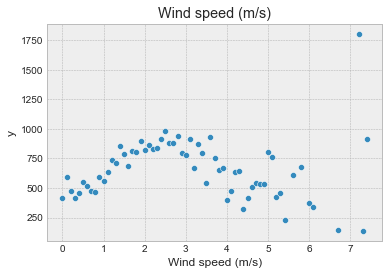

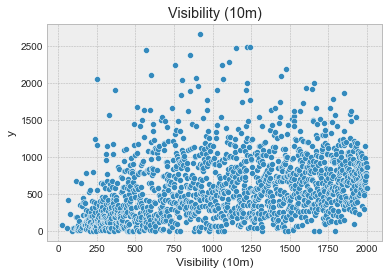

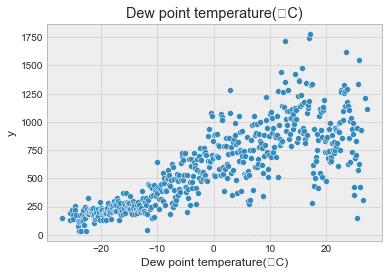

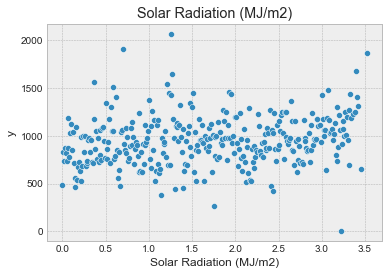

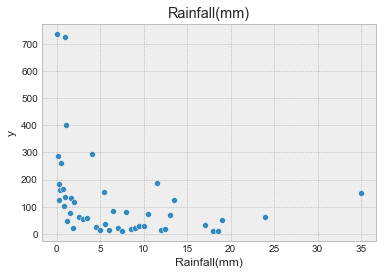

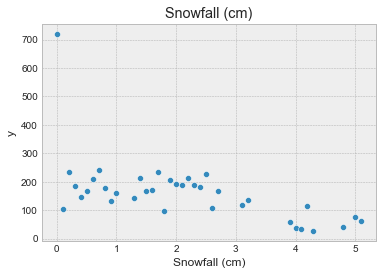

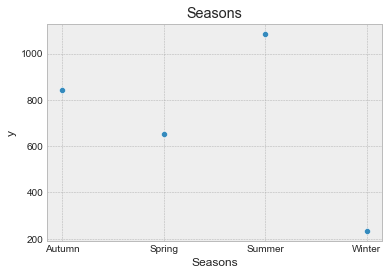

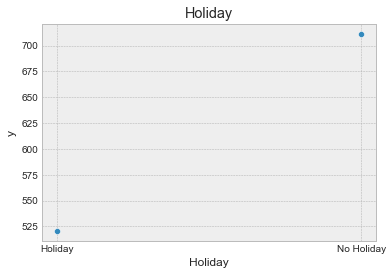

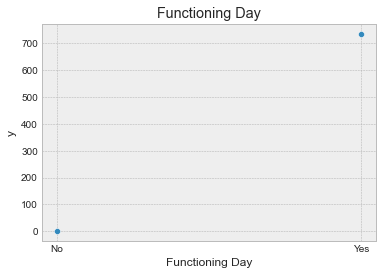

In [148]:
#Draw scatter plot between each feature and Target
drawFeatures_VS_y(train_df)

In [149]:
train_df.columns

Index(['ID', 'Date', 'y', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [150]:
# lst_objects = [ 'Seasons','Holiday', 'Functioning Day']
# fig, axes=plt.subplots(nrows=15, ncols=1, figsize=(10,80))
# col=0 # to avoid columns of ID and y
# k=0
# for i in range(16):
#     if train_df.columns[col] == 'y':
#         k = 1
#         pass
#     elif train_df.columns[col] in lst_objects:
#         #sns.histplot(data=df, x='y', hue=df.columns[col], ax=axes[i], kde=True)
#         sns.boxplot(data=train_df, x=train_df.columns[col], y='y', ax=axes[i-k])
#     elif train_df.columns[col] in ['Hour', 'Temperature(�C)', 'Humidity(%)',
#        'Wind speed (m/s)', 'Visibility (10m)',
#        'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']:
#         sns.boxplot(data=train_df, x=train_df.columns[col], y='y', ax=axes[i-k])
#     else:
#         sns.scatterplot(data=train_df, x=train_df.columns[col], y='y', ax=axes[i-k])
#     col+=1

In [151]:
# see the mean of label to every unique value of each column
#may be helpful to know most important features and for featur engineerng and encoding
def insights(df):
    for col in df.columns:
        if col=='y':
            continue
        else:
            display(df[[col, 'y']].groupby([col], as_index=False).mean().sort_values(by='y', ascending=False).T)

In [152]:
insights(train_df)

,3330,3162,3354,2970,3066,4554,4722,4602,2994,4578,...,4830,4831,4832,4833,5472,4834,4835,4836,5328,4773
ID,3330.0,3162.0,3354.0,2970.0,3066.0,4554.0,4722.0,4602.0,2994.0,4578.0,...,4830.0,4831.0,4832.0,4833.0,5472.0,4834.0,4835.0,4836.0,5328.0,4773.0
y,3556.0,3404.0,3384.0,3380.0,3309.0,3298.0,3277.0,3256.0,3227.0,3222.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,149,221,89,233,137,185,66,173,53,41,...,212,70,105,45,106,34,112,21,123,224
Date,13/06/2018,19/06/2018,08/06/2018,20/06/2018,12/06/2018,16/06/2018,06/07/2018,15/06/2018,05/06/2018,04/06/2018,...,18/09/2018,06/11/2018,09/10/2018,04/10/2018,09/11/2018,03/11/2018,10/05/2018,02/10/2018,11/04/2018,19/09/2018
y,1506.208333,1472.875,1462.625,1443.291667,1439.333333,1431.666667,1403.166667,1395.5,1392.666667,1385.708333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,18,19,17,20,21,8,16,22,15,14,...,7,11,0,10,1,2,6,3,5,4
Hour,18.0000,19.0000,17.000000,20.000000,21.000000,8.000000,16.000000,22.000,15.000000,14.000,...,7.000000,11.000,0.000000,10.000000,1.0000,2.000000,6.0000,3.000000,5.000000,4.000000
y,1508.8875,1199.0875,1145.395833,1074.241667,1034.479167,1000.254167,930.329167,920.525,828.929167,762.625,...,604.316667,599.725,540.654167,524.970833,419.2875,294.354167,290.8125,198.366667,139.745833,131.704167


,491,509,461,464,407,405,397,497,285,432,...,27,16,21,28,13,32,4,2,10,3
Temperature(�C),35.2,37.8,32.2,32.5,26.800000,26.6,25.800000,36.1,14.600000,29.30,...,-11.3,-12.5,-11.9,-11.200,-12.8,-10.8,-14.1,-14.6,-13.1,-14.3
y,1947.0,1929.0,1839.6,1681.0,1623.416667,1588.0,1565.916667,1553.0,1548.833333,1535.25,...,80.5,76.0,75.5,74.125,70.0,62.0,42.0,35.0,34.0,30.0


,3,35,33,34,42,21,51,11,64,31,...,76,77,80,81,82,78,85,84,83,79
Humidity(%),16.0,48.000000,46.000000,47.000000,55.00,34.000000,64.00,24.00,77.000000,44.000000,...,89.000000,90.000000,93.00,94.000000,95.000000,91.000000,98.000000,97.000000,96.000000,92.000000
y,955.0,934.695652,917.654321,911.788991,895.58,892.666667,886.47,871.25,868.352941,853.061404,...,306.204545,272.133333,251.56,196.151515,174.833333,174.428571,165.930233,159.268293,134.153846,130.944444


,60,25,28,36,31,24,62,19,26,27,...,3,45,0,40,57,58,44,54,59,61
Wind speed (m/s),7.2,2.500000,2.800000,3.600000,3.1,2.400000,7.4,1.900000,2.600000,2.700000,...,0.300000,4.500000,0.000000,4.000000,6.0,6.1,4.4,5.4,6.7,7.3
y,1805.0,980.254545,944.010309,929.769231,917.0,916.725352,913.0,897.964029,878.779661,877.833333,...,419.366071,412.823529,412.435484,402.034483,375.0,336.0,326.8,233.0,146.0,133.0


,625,875,890,814,353,576,778,740,498,1096,...,318,751,261,716,156,1105,672,741,1380,281
Visibility (10m),919.0,1225.0,1245.0,1152.0,566.0,857.0,1109.0,1063.0,758.0,1478.0,...,521.0,1075.0,456.0,1033.0,328.0,1488.0,975.0,1064.0,1792.0,478.0
y,2664.0,2481.0,2479.0,2474.0,2440.0,2379.0,2276.0,2248.0,2246.0,2191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,422,420,377,486,510,408,370,395,402,403,...,9,17,12,38,21,10,133,11,24,15
Dew point temperature(�C),17.10,16.900000,12.600000,23.5,25.9,15.7,11.90000,14.4,15.1000,15.2,...,-24.2,-23.400000,-23.9,-21.3,-23.0,-24.1,-11.8,-24.0,-22.7,-23.6
y,1781.75,1745.111111,1717.230769,1618.5,1553.0,1476.4,1443.62963,1425.3,1367.0625,1358.2,...,124.0,120.666667,114.0,105.0,87.0,81.0,39.5,36.0,33.0,30.0


,126,70,339,335,127,37,121,59,305,193,...,0,67,241,15,140,130,244,114,175,320
Solar Radiation (MJ/m2),1.26,0.7,3.52,3.39,1.270000,0.370,1.21,0.590,3.070000,1.93,...,0.000000,0.670000,2.41,0.1500,1.4,1.3,2.440000,1.140000,1.75,3.22
y,2065.60,1909.2,1865.00,1675.00,1647.571429,1562.875,1539.75,1505.625,1476.666667,1460.25,...,484.394913,478.666667,477.00,459.5625,455.5,439.6,416.666667,377.111111,268.20,0.00


,0,8,10,19,1,5,34,2,6,4,...,14,26,29,36,24,21,35,41,40,27
Rainfall(mm),0.000000,0.9,1.1,4.0,0.100000,0.500000,11.5,0.2,0.7,0.400000,...,1.9,7.0,8.5,12.5,6.0,5.0,12.0,18.5,18.0,7.5
y,736.652174,723.5,401.0,294.0,288.423077,259.582278,187.0,183.0,165.0,160.818182,...,22.0,22.0,19.5,17.0,15.4,15.0,13.0,11.0,10.5,9.0


,0,7,15,2,23,12,20,6,17,18,...,24,1,16,34,35,28,33,29,30,32
Snowfall (cm),0.000000,0.7,1.7,0.200000,2.5,1.4,2.200000,0.6,1.9,2.0,...,2.600000,0.1,1.8,5.0,5.1,3.9,4.8,4.0,4.1,4.3
y,720.744086,241.0,235.5,233.545455,228.5,214.5,212.666667,208.4,206.5,192.4,...,105.909091,102.5,96.0,76.0,62.0,58.0,40.0,36.0,35.0,25.0


,2,0,1,3
Seasons,Summer,Autumn,Spring,Winter
y,1085.705556,843.493056,652.969444,231.767361


,1,0
Holiday,No Holiday,Holiday
y,711.452536,520.204167


,1,0
Functioning Day,Yes,No
y,735.002177,0.0


In [153]:
#Calc the skeweness of each continous feature

def calc_skew(df):
    print("\nIF THE DATA IS HIGHLY SKEWED IF SKWENESS  > 1 OR < -1 \n")
    for col in df.loc[:, df.dtypes != np.object ]:
        print("the skewness of ",col,"is :",df[col].skew())

calc_skew(train_df)


IF THE DATA IS HIGHLY SKEWED IF SKWENESS  > 1 OR < -1 

the skewness of  ID is : 0.0
the skewness of  y is : 1.1590601920920565
the skewness of  Hour is : 0.0
the skewness of  Temperature(�C) is : -0.17155896336658052
the skewness of  Humidity(%) is : 0.11063674176092278
the skewness of  Wind speed (m/s) is : 0.9364808387049572
the skewness of  Visibility (10m) is : -0.8072259539269564
the skewness of  Dew point temperature(�C) is : -0.3208664382917592
the skewness of  Solar Radiation (MJ/m2) is : 1.4856003486591776
the skewness of  Rainfall(mm) is : 15.636451487279034
the skewness of  Snowfall (cm) is : 8.908510527779756


# Preprocessing And Feature Engineering

In [154]:
# Transform data
def transformation(df,columns,func):
    for col in columns:
        df[col]=func(df[col])
    return df

#Demo of function params
#transformation(test_df,['Temperature(�C)','Hour'],np.log1p)

In [155]:
#Dropping Outliers beuond 99 Percentile
cnt=train_df['y'].values
q99=np.percentile(cnt,[99])
train_df=train_df[train_df['y']<q99[0]]
train_df.shape



(5702, 15)

In [156]:
# Adding Day Month Year to data frame
def add_day_month_year(df):
    df['Year'] =  pd.DatetimeIndex(df['Date']).year
    df['Month'] =  pd.DatetimeIndex(df['Date']).month
    df['day'] =  pd.DatetimeIndex(df['Date']).day
    df['weekday'] =  pd.DatetimeIndex(df['Date']).dayofweek
    df['weekofyear']= pd.DatetimeIndex(df['Date']).weekofyear
    df['dayofyear']= pd.DatetimeIndex(df['Date']).dayofyear
    #df['Hour']= pd.DatetimeIndex(df['datetime']).hour
    return df


In [157]:
#Calculate if it day or night and the hours of the day the bikes rented the most these ours are :8,17,18,19,20,21
def add_rush_hours(df):
    df['RushHour']= df['Hour'].isin([8,17,18,19,20,21])
    df['lowHour']= df['Hour'].isin([0,1,2,3,4])
    return df

In [158]:
def add_day_or_night(df):
    df['DayorNight'] = (df['Hour'] >= 7) & (df['Hour'] <= 20)
#     df['Morning'] = np.where((5 <= df.Hour) & (df.Hour <= 12), 1, 0)
#     df['Afternoon'] = np.where((12 < df.Hour) & (df.Hour <= 17), 1, 0)
#     df['Evening'] = np.where((17 < df.Hour) & (df.Hour <= 21), 1, 0)
#     df['Night'] = np.where((21 < df.Hour) | (df.Hour < 5 ), 1, 0)
    df["temp_range"] = df["Temperature(�C)"]
    for indx, i in enumerate(list(df["Temperature(�C)"])):
        if i <=10:
            df["temp_range"][indx] = 0
        elif 10 < i <= 18 :
            df["temp_range"][indx] = 2
        elif 18 < i <= 25 :
            df["temp_range"][indx] = 3
        elif 25 < i <= 32 :
            df["temp_range"][indx] = 4
        elif 32 < i :
            df["temp_range"][indx] = 1
            

    return df

In [159]:
print(train_df.head())

   ID        Date    y  Hour  Temperature(�C)  Humidity(%)  Wind speed (m/s)  \
0   0  01/12/2017  254     0             -5.2           37               2.2   
1   1  01/12/2017  204     1             -5.5           38               0.8   
2   2  01/12/2017  173     2             -6.0           39               1.0   
3   3  01/12/2017  107     3             -6.2           40               0.9   
4   4  01/12/2017   78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(�C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  

In [160]:
def weekend(df):
    for indx, i in enumerate(list(df["weekday"])):

        if i =="Sunday" or i=="Saturday" :
            df['weekday'][indx] = 0
        else:
            df['weekday'][indx] = 1
    df["weekday"] = df[["weekday"]].astype(int)
    return df

In [161]:
def label_encoding(df):
    cat_features = df.select_dtypes(exclude=["number"])
    for col in cat_features.columns:
        if col != 'datetime':
            df[col] = pd.factorize(df[col])[0].reshape(-1, 1)
    return df 


In [162]:
def Feature_Adding(df):
    df['ideal'] = df[['Temperature(�C)', 'Wind speed (m/s)']].apply(lambda x: (0, 1)[x['Temperature(�C)'] >= 27 and x['Wind speed (m/s)'] <= 30], axis = 1)

    df['peak'] = df[['Hour', 'Functioning Day']].apply(lambda x: (0, 1)[(x['Functioning Day'] == 1 
                and  ( x['Hour'] == 8 or 17 <= x['Hour'] <= 18 or 12 <= x['Hour'] <= 13)) or (x['Functioning Day'] == 0 and  10 <= x['Hour'] <= 19)], axis = 1)
# dataTrain['bad'] = dataTrain[['weather', 'humidity']].apply(lambda x: (0, 1)[x['weather'] > 2 and x['humidity'] >50], axis = 1)
# dataTest['bad'] = dataTest[['weather', 'humidity']].apply(lambda x: (0, 1)[x['weather'] > 2 and x['humidity'] >50], axis = 1)
    #sandy
    df['Holiday'] = df[['Month', 'day', 'Holiday', 'Year']].apply(lambda x: (x['Holiday'], 1)[x['Year'] == 2012 and x['Month'] == 10 and (x['day'] in [30])], axis = 1)

    #christmas day and others
    df['Holiday'] = df[['Month', 'day', 'Holiday']].apply(lambda x: (x['Holiday'], 1)[x['Month'] == 12 and (x['day'] in [24, 26, 31])], axis = 1)
    df['Functioning Day'] = df[['Month', 'day', 'Functioning Day']].apply(lambda x: (x['Functioning Day'], 0)[x['Month'] == 12 and x['day'] in [24, 31]], axis = 1)
    df['sticky'] = df[['Humidity(%)', 'Functioning Day']].apply(lambda x: (0, 1)[x['Functioning Day'] == 1 and x['Humidity(%)'] >= 60], axis = 1)
    return df

In [163]:
def preprocessing(df):
    new_df=add_day_month_year(df)
    new_df=add_rush_hours(new_df)
    new_df=add_day_or_night(new_df)
   # new_df= weekend(new_df) 
    new_df=label_encoding(new_df)
    new_df= Feature_Adding(new_df)
    return new_df

In [164]:
train_data=preprocessing(train_df)
test_data=preprocessing(test_df)



In [165]:
train_data.head()

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),...,weekday,weekofyear,dayofyear,RushHour,lowHour,DayorNight,temp_range,ideal,peak,sticky
0,0,0,254,0,-5.2,37,2.2,2000,-17.6,0.0,...,3,2,12,0,0,0,0.0,0,0,0
1,1,0,204,1,-5.5,38,0.8,2000,-17.6,0.0,...,3,2,12,0,0,0,0.0,0,0,0
2,2,0,173,2,-6.0,39,1.0,2000,-17.7,0.0,...,3,2,12,0,0,0,0.0,0,0,0
3,3,0,107,3,-6.2,40,0.9,2000,-17.6,0.0,...,3,2,12,0,0,0,0.0,0,0,0
4,4,0,78,4,-6.0,36,2.3,2000,-18.6,0.0,...,3,2,12,0,0,0,0.0,0,0,0


In [166]:
train_data.head()

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),...,weekday,weekofyear,dayofyear,RushHour,lowHour,DayorNight,temp_range,ideal,peak,sticky
0,0,0,254,0,-5.2,37,2.2,2000,-17.6,0.0,...,3,2,12,0,0,0,0.0,0,0,0
1,1,0,204,1,-5.5,38,0.8,2000,-17.6,0.0,...,3,2,12,0,0,0,0.0,0,0,0
2,2,0,173,2,-6.0,39,1.0,2000,-17.7,0.0,...,3,2,12,0,0,0,0.0,0,0,0
3,3,0,107,3,-6.2,40,0.9,2000,-17.6,0.0,...,3,2,12,0,0,0,0.0,0,0,0
4,4,0,78,4,-6.0,36,2.3,2000,-18.6,0.0,...,3,2,12,0,0,0,0.0,0,0,0


In [167]:
test_data.columns

Index(['ID', 'Date', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'day', 'weekday',
       'weekofyear', 'dayofyear', 'RushHour', 'lowHour', 'DayorNight',
       'temp_range', 'ideal', 'peak', 'sticky'],
      dtype='object')

In [168]:
calc_skew(train_df)


IF THE DATA IS HIGHLY SKEWED IF SKWENESS  > 1 OR < -1 

the skewness of  ID is : 0.009673459320705948
the skewness of  Date is : 0.009600606502303861
the skewness of  y is : 1.0165884426081715
the skewness of  Hour is : 0.020144509888163624
the skewness of  Temperature(�C) is : -0.15786072179973876
the skewness of  Humidity(%) is : 0.10393193828692371
the skewness of  Wind speed (m/s) is : 0.9518511859975718
the skewness of  Visibility (10m) is : -0.8003451946507975
the skewness of  Dew point temperature(�C) is : -0.3082520884626985
the skewness of  Solar Radiation (MJ/m2) is : 1.4849916600248019
the skewness of  Rainfall(mm) is : 15.557508644537933
the skewness of  Snowfall (cm) is : 8.862021242902859
the skewness of  Seasons is : 0.01105124090324903
the skewness of  Holiday is : 4.562151151319874
the skewness of  Functioning Day is : 4.487860953366732
the skewness of  Year is : -2.9959652280835765
the skewness of  Month is : 0.0007369652471649714
the skewness of  day is : -0.0019417

In [169]:
cols=['y','Rainfall(mm)', 'Snowfall (cm)','RushHour','lowHour','Year','Functioning Day','Holiday','Solar Radiation (MJ/m2)']
final_train_data=transformation(train_data,cols,np.log1p)


In [170]:
final_train_data.head()


,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),...,weekday,weekofyear,dayofyear,RushHour,lowHour,DayorNight,temp_range,ideal,peak,sticky
0,0,0,5.541264,0,-5.2,37,2.2,2000,-17.6,0.0,...,3,2,12,0.0,0.0,0,0.0,0,0,0
1,1,0,5.323010,1,-5.5,38,0.8,2000,-17.6,0.0,...,3,2,12,0.0,0.0,0,0.0,0,0,0
2,2,0,5.159055,2,-6.0,39,1.0,2000,-17.7,0.0,...,3,2,12,0.0,0.0,0,0.0,0,0,0
3,3,0,4.682131,3,-6.2,40,0.9,2000,-17.6,0.0,...,3,2,12,0.0,0.0,0,0.0,0,0,0
4,4,0,4.369448,4,-6.0,36,2.3,2000,-18.6,0.0,...,3,2,12,0.0,0.0,0,0.0,0,0,0


In [171]:
final_test_data=test_data.copy()
col=['Rainfall(mm)', 'Snowfall (cm)','RushHour','lowHour','Year','Functioning Day','Holiday','Solar Radiation (MJ/m2)']
final_test_data=transformation(final_test_data,col,np.log1p)

In [172]:
final_train_data.head()

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),...,weekday,weekofyear,dayofyear,RushHour,lowHour,DayorNight,temp_range,ideal,peak,sticky
0,0,0,5.541264,0,-5.2,37,2.2,2000,-17.6,0.0,...,3,2,12,0.0,0.0,0,0.0,0,0,0
1,1,0,5.323010,1,-5.5,38,0.8,2000,-17.6,0.0,...,3,2,12,0.0,0.0,0,0.0,0,0,0
2,2,0,5.159055,2,-6.0,39,1.0,2000,-17.7,0.0,...,3,2,12,0.0,0.0,0,0.0,0,0,0
3,3,0,4.682131,3,-6.2,40,0.9,2000,-17.6,0.0,...,3,2,12,0.0,0.0,0,0.0,0,0,0
4,4,0,4.369448,4,-6.0,36,2.3,2000,-18.6,0.0,...,3,2,12,0.0,0.0,0,0.0,0,0,0


In [173]:
# from sklearn.ensemble import RandomForestRegressor
# def wind_replace_zero(data):
#     dataWind0 = data[data["Wind speed (m/s)"]==0]
#     dataWindNot0 = data[data["Wind speed (m/s)"]!=0]
#     rfModel_wind = RandomForestRegressor()
#     windColumns = ['Seasons','Rainfall(mm)', 'Snowfall (cm)','Humidity(%)',"Month",'Temperature(�C)',"Year",'Dew point temperature(�C)']
#     rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["Wind speed (m/s)"])

#     wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
#     dataWind0["Wind speed (m/s)"] = wind0Values
#     data = dataWindNot0.append(dataWind0)
#     data.reset_index(inplace=True)
#     data.drop('index',inplace=True,axis=1)
#     return data
# final_train_data=wind_replace_zero(final_train_data)
# final_test_data=wind_replace_zero(final_test_data)

# Grid Search

### Splitting Data into Features and target

In [174]:
Y=final_train_data[['y']]


final_train_data.drop(columns=['Date','y','Dew point temperature(�C)','Year'],inplace = True)
final_test_data.drop(columns=['Date','Dew point temperature(�C)','Year'],inplace = True)


In [175]:
final_train_data.drop(columns=['ID'],inplace = True)


In [176]:
final_test_data.drop(columns=['ID'],inplace = True)

In [177]:
test_data.columns


Index(['ID', 'Date', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'day', 'weekday',
       'weekofyear', 'dayofyear', 'RushHour', 'lowHour', 'DayorNight',
       'temp_range', 'ideal', 'peak', 'sticky'],
      dtype='object')

In [178]:
final_train_data.head()
final_test_data.head()

,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,...,weekday,weekofyear,dayofyear,RushHour,lowHour,DayorNight,temp_range,ideal,peak,sticky
0,0,-1.3,90,2.0,259,0.0,0.0,1.163151,0,0.0,...,3,51,355,0.0,0.0,0,0.0,0,0,0
1,1,-1.8,90,1.6,263,0.0,0.0,1.163151,0,0.0,...,3,51,355,0.0,0.0,0,0.0,0,0,0
2,2,-2.2,88,1.4,348,0.0,0.0,1.163151,0,0.0,...,3,51,355,0.0,0.0,0,0.0,0,0,0
3,3,-2.9,89,1.3,288,0.0,0.0,1.163151,0,0.0,...,3,51,355,0.0,0.0,0,0.0,0,0,0
4,4,-3.6,91,1.2,241,0.0,0.0,1.163151,0,0.0,...,3,51,355,0.0,0.0,0,0.0,0,0,0


In [179]:
# define min max scaler
col=['Temperature(�C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Seasons','Month', 'weekday', 'weekofyear',
                       'dayofyear', 'DayorNight']

scaler = MinMaxScaler()
# transform data
final_train_data[col] = scaler.fit_transform(final_train_data.loc[:,col])
#display(dataTrain)
final_test_data[col] = scaler.fit_transform(final_test_data.loc[:,col])

In [180]:
X_train, X_valid, y_train, y_valid = train_test_split(final_train_data,Y, train_size=0.8, test_size=0.2,random_state=0)


In [181]:
#evaluation matrix
def rmsle(y_pred,y_true):
    y_pred = np.expm1(y_pred)
    y_true = np.expm1(y_true)
    log1=np.log(y_pred + 1)
    log2=np.log(y_true + 1)
    se = (log1 - log2) ** 2 
    mse=np.mean(se)
    return np.sqrt(mse)

from sklearn.metrics import make_scorer
myScorer = make_scorer(rmsle, greater_is_better=False)

In [182]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5702 entries, 0 to 5759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hour                     5702 non-null   int64  
 1   Temperature(�C)          5702 non-null   float64
 2   Humidity(%)              5702 non-null   float64
 3   Wind speed (m/s)         5702 non-null   float64
 4   Visibility (10m)         5702 non-null   float64
 5   Solar Radiation (MJ/m2)  5702 non-null   float64
 6   Rainfall(mm)             5702 non-null   float64
 7   Snowfall (cm)            5702 non-null   float64
 8   Seasons                  5702 non-null   float64
 9   Holiday                  5702 non-null   float64
 10  Functioning Day          5702 non-null   float64
 11  Month                    5702 non-null   float64
 12  day                      5702 non-null   int64  
 13  weekday                  5702 non-null   float64
 14  weekofyear              

In [183]:
HistGradient = HistGradientBoostingRegressor()

param = {#n_estimators' : [180], 
    'max_iter':[115],
    'max_depth' : [11],
    'max_leaf_nodes':[15],
    'max_bins':[150]
         #min_samples_split':[2],
         #min_samples_leaf':[1],
        }
gridSearch_HistGradient = GridSearchCV(HistGradient,param,scoring=myScorer,cv=10,verbose=3)
gridSearch_HistGradient.fit(X_train,y_train.values.ravel())

best_HistGradient = gridSearch_HistGradient.best_estimator_
bestHistGradient_testScore=best_HistGradient.score(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END max_bins=150, max_depth=11, max_iter=115, max_leaf_nodes=15;, score=-0.349 total time=   1.3s
[CV 2/10] END max_bins=150, max_depth=11, max_iter=115, max_leaf_nodes=15;, score=-0.446 total time=   0.6s
[CV 3/10] END max_bins=150, max_depth=11, max_iter=115, max_leaf_nodes=15;, score=-0.349 total time=   0.6s
[CV 4/10] END max_bins=150, max_depth=11, max_iter=115, max_leaf_nodes=15;, score=-0.373 total time=   0.6s
[CV 5/10] END max_bins=150, max_depth=11, max_iter=115, max_leaf_nodes=15;, score=-0.400 total time=   0.5s
[CV 6/10] END max_bins=150, max_depth=11, max_iter=115, max_leaf_nodes=15;, score=-0.379 total time=   0.5s
[CV 7/10] END max_bins=150, max_depth=11, max_iter=115, max_leaf_nodes=15;, score=-0.355 total time=   0.5s
[CV 8/10] END max_bins=150, max_depth=11, max_iter=115, max_leaf_nodes=15;, score=-0.387 total time=   0.5s
[CV 9/10] END max_bins=150, max_depth=11, max_iter=115, max_leaf_nodes=15;,

In [184]:
gridSearch_HistGradient.best_params_

{'max_bins': 150, 'max_depth': 11, 'max_iter': 115, 'max_leaf_nodes': 15}

In [185]:
bestHistGradient_testScore

0.9672917237538092

In [186]:
pred_train=best_HistGradient.predict(X_train)
print(rmsle(pred_train,y_train.values.ravel()))

pred=best_HistGradient.predict(X_valid)
print(rmsle(pred,y_valid.values.ravel()))

0.30286207407540294
0.3421541215797451


In [187]:
# import xgboost as xgb

# xg_reg = xgb.XGBRegressor( colsample_bytree = 0.6, learning_rate = 0.22,min_child_weight =30, max_depth = 7,  n_estimators = 90)
# xg_reg.fit(X_train,y_train)

# pred_train=xg_reg.predict(X_train)
# print(rmsle(pred_train,y_train.values.ravel()))

# pred=xg_reg.predict(X_valid)
# print(rmsle(pred,y_valid.values.ravel()))


In [188]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import KFold
# from xgboost import XGBRegressor

# model = XGBRegressor()
# n_estimators = [200]
# max_depth = [5]
# #model.set_param({"predictor": "gpu_predictor"})
# param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
# print(param_grid)

# kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# grid_search = GridSearchCV(model, param_grid, scoring="neg_root_mean_squared_error",cv=kfold, n_jobs=-1, verbose=1, return_train_score=True)

# grid_result = grid_search.fit(X_train, y_train)

# print("Best: %f using %s" % (abs(grid_result.best_score_),grid_result.best_params_))
# results = pd.DataFrame(grid_search.cv_results_)
# pred_train=grid_result.predict(X_train)
# print(rmsle(pred_train,y_train.values.ravel()))

# pred=grid_result.predict(X_valid)
# print(rmsle(pred,y_valid.values.ravel()))



In [189]:
# GBM model
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# params = {'n_estimators': 150, 'max_depth': 5, 'random_state': 0, 'min_samples_leaf' : 10, 'learning_rate': 0.1, 'subsample': 0.7, 'loss': 'ls'}
# gbm_model = GradientBoostingRegressor(**params)

# gbm_model.fit(X_train,y_train.values.ravel())

# pred_train=gbm_model.predict(X_train)
# print(rmsle(pred_train,y_train.values.ravel()))

# pred=gbm_model.predict(X_valid)
# print(rmsle(pred,y_valid.values.ravel()))

In [190]:
 r = permutation_importance(gridSearch_HistGradient, X_valid, y_valid.values.ravel(),
                            n_repeats=30)

for i in r.importances_mean.argsort()[::-1]:

    print(f"{X_train.columns[i]} "
           f"{r.importances_mean[i]:.3f} "
           f" +/- {r.importances_std[i]:.3f}")

Functioning Day 1.461  +/- 0.033
Hour 0.402  +/- 0.012
Temperature(�C) 0.381  +/- 0.010
Humidity(%) 0.289  +/- 0.012
Seasons 0.171  +/- 0.009
Rainfall(mm) 0.165  +/- 0.008
day 0.063  +/- 0.006
weekday 0.051  +/- 0.007
RushHour 0.042  +/- 0.003
dayofyear 0.028  +/- 0.003
Solar Radiation (MJ/m2) 0.023  +/- 0.004
Visibility (10m) 0.019  +/- 0.002
peak 0.014  +/- 0.002
Holiday 0.012  +/- 0.001
Month 0.006  +/- 0.002
weekofyear 0.006  +/- 0.001
Wind speed (m/s) 0.005  +/- 0.001
Snowfall (cm) 0.004  +/- 0.000
temp_range 0.002  +/- 0.001
DayorNight 0.001  +/- 0.000
lowHour 0.000  +/- 0.000
ideal 0.000  +/- 0.000
sticky 0.000  +/- 0.000


<BarContainer object of 23 artists>

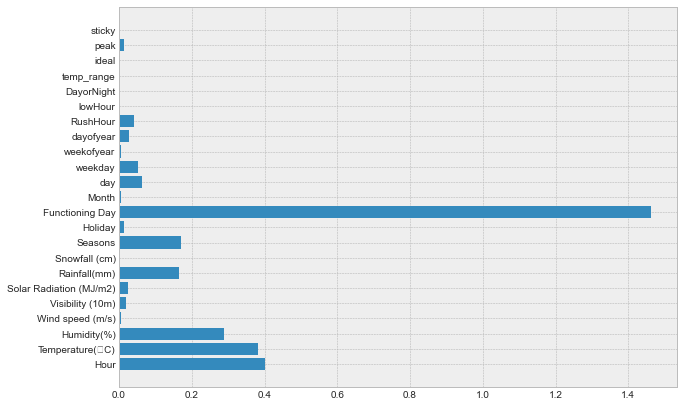

In [191]:
plt.figure(figsize=(10,7))
plt.barh(X_train.columns, r.importances_mean)

In [192]:
test_data.head(20)

,ID,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),...,weekday,weekofyear,dayofyear,RushHour,lowHour,DayorNight,temp_range,ideal,peak,sticky
0,5760,0,0,-1.3,90,2.0,259,-2.7,0.00,0.0,...,3,51,355,0,0,0,0.0,0,0,0
1,5761,0,1,-1.8,90,1.6,263,-3.2,0.00,0.0,...,3,51,355,0,0,0,0.0,0,0,0
2,5762,0,2,-2.2,88,1.4,348,-3.9,0.00,0.0,...,3,51,355,0,0,0,0.0,0,0,0
3,5763,0,3,-2.9,89,1.3,288,-4.4,0.00,0.0,...,3,51,355,0,0,0,0.0,0,0,0
4,5764,0,4,-3.6,91,1.2,241,-4.8,0.00,0.0,...,3,51,355,0,0,0,0.0,0,0,0
5,5765,0,5,-4.3,91,1.5,233,-5.5,0.00,0.0,...,3,51,355,0,1,0,0.0,0,0,0
6,5766,0,6,-4.8,91,1.1,266,-6.0,0.00,0.0,...,3,51,355,0,1,0,0.0,0,0,0
7,5767,0,7,-5.3,90,1.1,311,-6.6,0.00,0.0,...,3,51,355,0,1,1,0.0,0,0,0
8,5768,0,8,-5.6,89,0.9,371,-7.1,0.00,0.0,...,3,51,355,1,1,1,0.0,0,0,0
9,5769,0,9,-5.3,88,0.4,463,-6.9,0.21,0.0,...,3,51,355,0,1,1,0.0,0,0,0


In [193]:
test_data['y']=np.fix(np.expm1(best_HistGradient.predict(final_test_data))).astype(int)
test_data['y']=np.where(test_data['y']<0,0,test_data['y'])

In [194]:
final_test_data.head()

,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,...,weekday,weekofyear,dayofyear,RushHour,lowHour,DayorNight,temp_range,ideal,peak,sticky
0,0,0.295699,0.918367,0.289855,0.114896,0.0,0.0,1.163151,0.0,0.0,...,0.5,0.979592,0.97093,0.0,0.0,0.0,0.0,0,0,0
1,1,0.286738,0.918367,0.231884,0.116929,0.0,0.0,1.163151,0.0,0.0,...,0.5,0.979592,0.97093,0.0,0.0,0.0,0.0,0,0,0
2,2,0.279570,0.897959,0.202899,0.160142,0.0,0.0,1.163151,0.0,0.0,...,0.5,0.979592,0.97093,0.0,0.0,0.0,0.0,0,0,0
3,3,0.267025,0.908163,0.188406,0.129639,0.0,0.0,1.163151,0.0,0.0,...,0.5,0.979592,0.97093,0.0,0.0,0.0,0.0,0,0,0
4,4,0.254480,0.928571,0.173913,0.105745,0.0,0.0,1.163151,0.0,0.0,...,0.5,0.979592,0.97093,0.0,0.0,0.0,0.0,0,0,0


# 😄 Generating Submission File

In [196]:
test_data[['ID','y']].to_csv('dataset/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [197]:
test_data.head(10)

,ID,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),...,weekofyear,dayofyear,RushHour,lowHour,DayorNight,temp_range,ideal,peak,sticky,y
0,5760,0,0,-1.3,90,2.0,259,-2.7,0.00,0.0,...,51,355,0,0,0,0.0,0,0,0,162
1,5761,0,1,-1.8,90,1.6,263,-3.2,0.00,0.0,...,51,355,0,0,0,0.0,0,0,0,132
2,5762,0,2,-2.2,88,1.4,348,-3.9,0.00,0.0,...,51,355,0,0,0,0.0,0,0,0,92
3,5763,0,3,-2.9,89,1.3,288,-4.4,0.00,0.0,...,51,355,0,0,0,0.0,0,0,0,58
4,5764,0,4,-3.6,91,1.2,241,-4.8,0.00,0.0,...,51,355,0,0,0,0.0,0,0,0,31
5,5765,0,5,-4.3,91,1.5,233,-5.5,0.00,0.0,...,51,355,0,1,0,0.0,0,0,0,32
6,5766,0,6,-4.8,91,1.1,266,-6.0,0.00,0.0,...,51,355,0,1,0,0.0,0,0,0,52
7,5767,0,7,-5.3,90,1.1,311,-6.6,0.00,0.0,...,51,355,0,1,1,0.0,0,0,0,119
8,5768,0,8,-5.6,89,0.9,371,-7.1,0.00,0.0,...,51,355,1,1,1,0.0,0,0,0,230
9,5769,0,9,-5.3,88,0.4,463,-6.9,0.21,0.0,...,51,355,0,1,1,0.0,0,0,0,201
